**Mengupload File**

In [1]:
# 🔹 Library untuk manipulasi data
import pandas as pd
import numpy as np

# 🔹 Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Library untuk preprocessing dan pemodelan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 🔹 Library untuk algoritma machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 🔹 Library untuk evaluasi model
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# 🔹 Pengaturan umum
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

# 🔹 Styling plot
plt.style.use("ggplot")
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', None)

**Data Exploration**

**Membaca dan menampilkan data**

In [2]:
df=pd.read_csv('students_dropout_academic_success_terbaru.csv')
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


**Menampilkan tipe data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

**Statistik deskriptif dari kolom-kolom numerik dalam DataFrame**

In [4]:
df.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


**Menampilkan baris-baris dalam DataFrame yang memiliki nilai kosong (missing values)**

In [5]:
# Buat dataframe ringkasan missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = (
    pd.DataFrame({
        'Fitur': missing.index,
        'Jumlah Missing': missing.values,
        'Persentase (%)': missing_percent.round(2)
    })
    .sort_values(by='Persentase (%)', ascending=False)
    .reset_index(drop=True)
)

# Tampilkan hanya fitur yang memiliki missing value
missing_df = missing_df[missing_df['Jumlah Missing'] > 0]

# Tampilkan hasil
print("Ringkasan Missing Values pada df:")
display(missing_df.style
        .bar(subset=['Persentase (%)'], color='#ffa07a')
        .background_gradient(subset=['Jumlah Missing'], cmap='Reds')
        .set_properties(**{'text-align': 'left'})
        .set_caption("Tabel Informasi Missing Value"))

Ringkasan Missing Values pada df:


,Fitur,Jumlah Missing,Persentase (%)


In [6]:
# Sebelumnya
# print(df[df.isnull()])

**Mendeteksi baris duplikat dalam DataFrame**

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Sebelumnya

# duplicated_rows = df[df.duplicated()]
# print(duplicated_rows)

**Memvisualisasikan hubungan antar variabel menggunakan heatmap**

Matriks Korelasi:
                                                Marital Status  \
Marital Status                                        1.000000   
Application mode                                      0.274985   
Application order                                    -0.130370   
Course                                                0.042012   
Daytime/evening attendance                           -0.265823   
Previous qualification                                0.070984   
Previous qualification (grade)                       -0.038869   
Nacionality                                          -0.008899   
Mother's qualification                                0.185117   
Father's qualification                                0.124995   
Mother's occupation                                   0.053892   
Father's occupation                                   0.050499   
Admission grade                                      -0.012440   
Displaced                                            -0.24

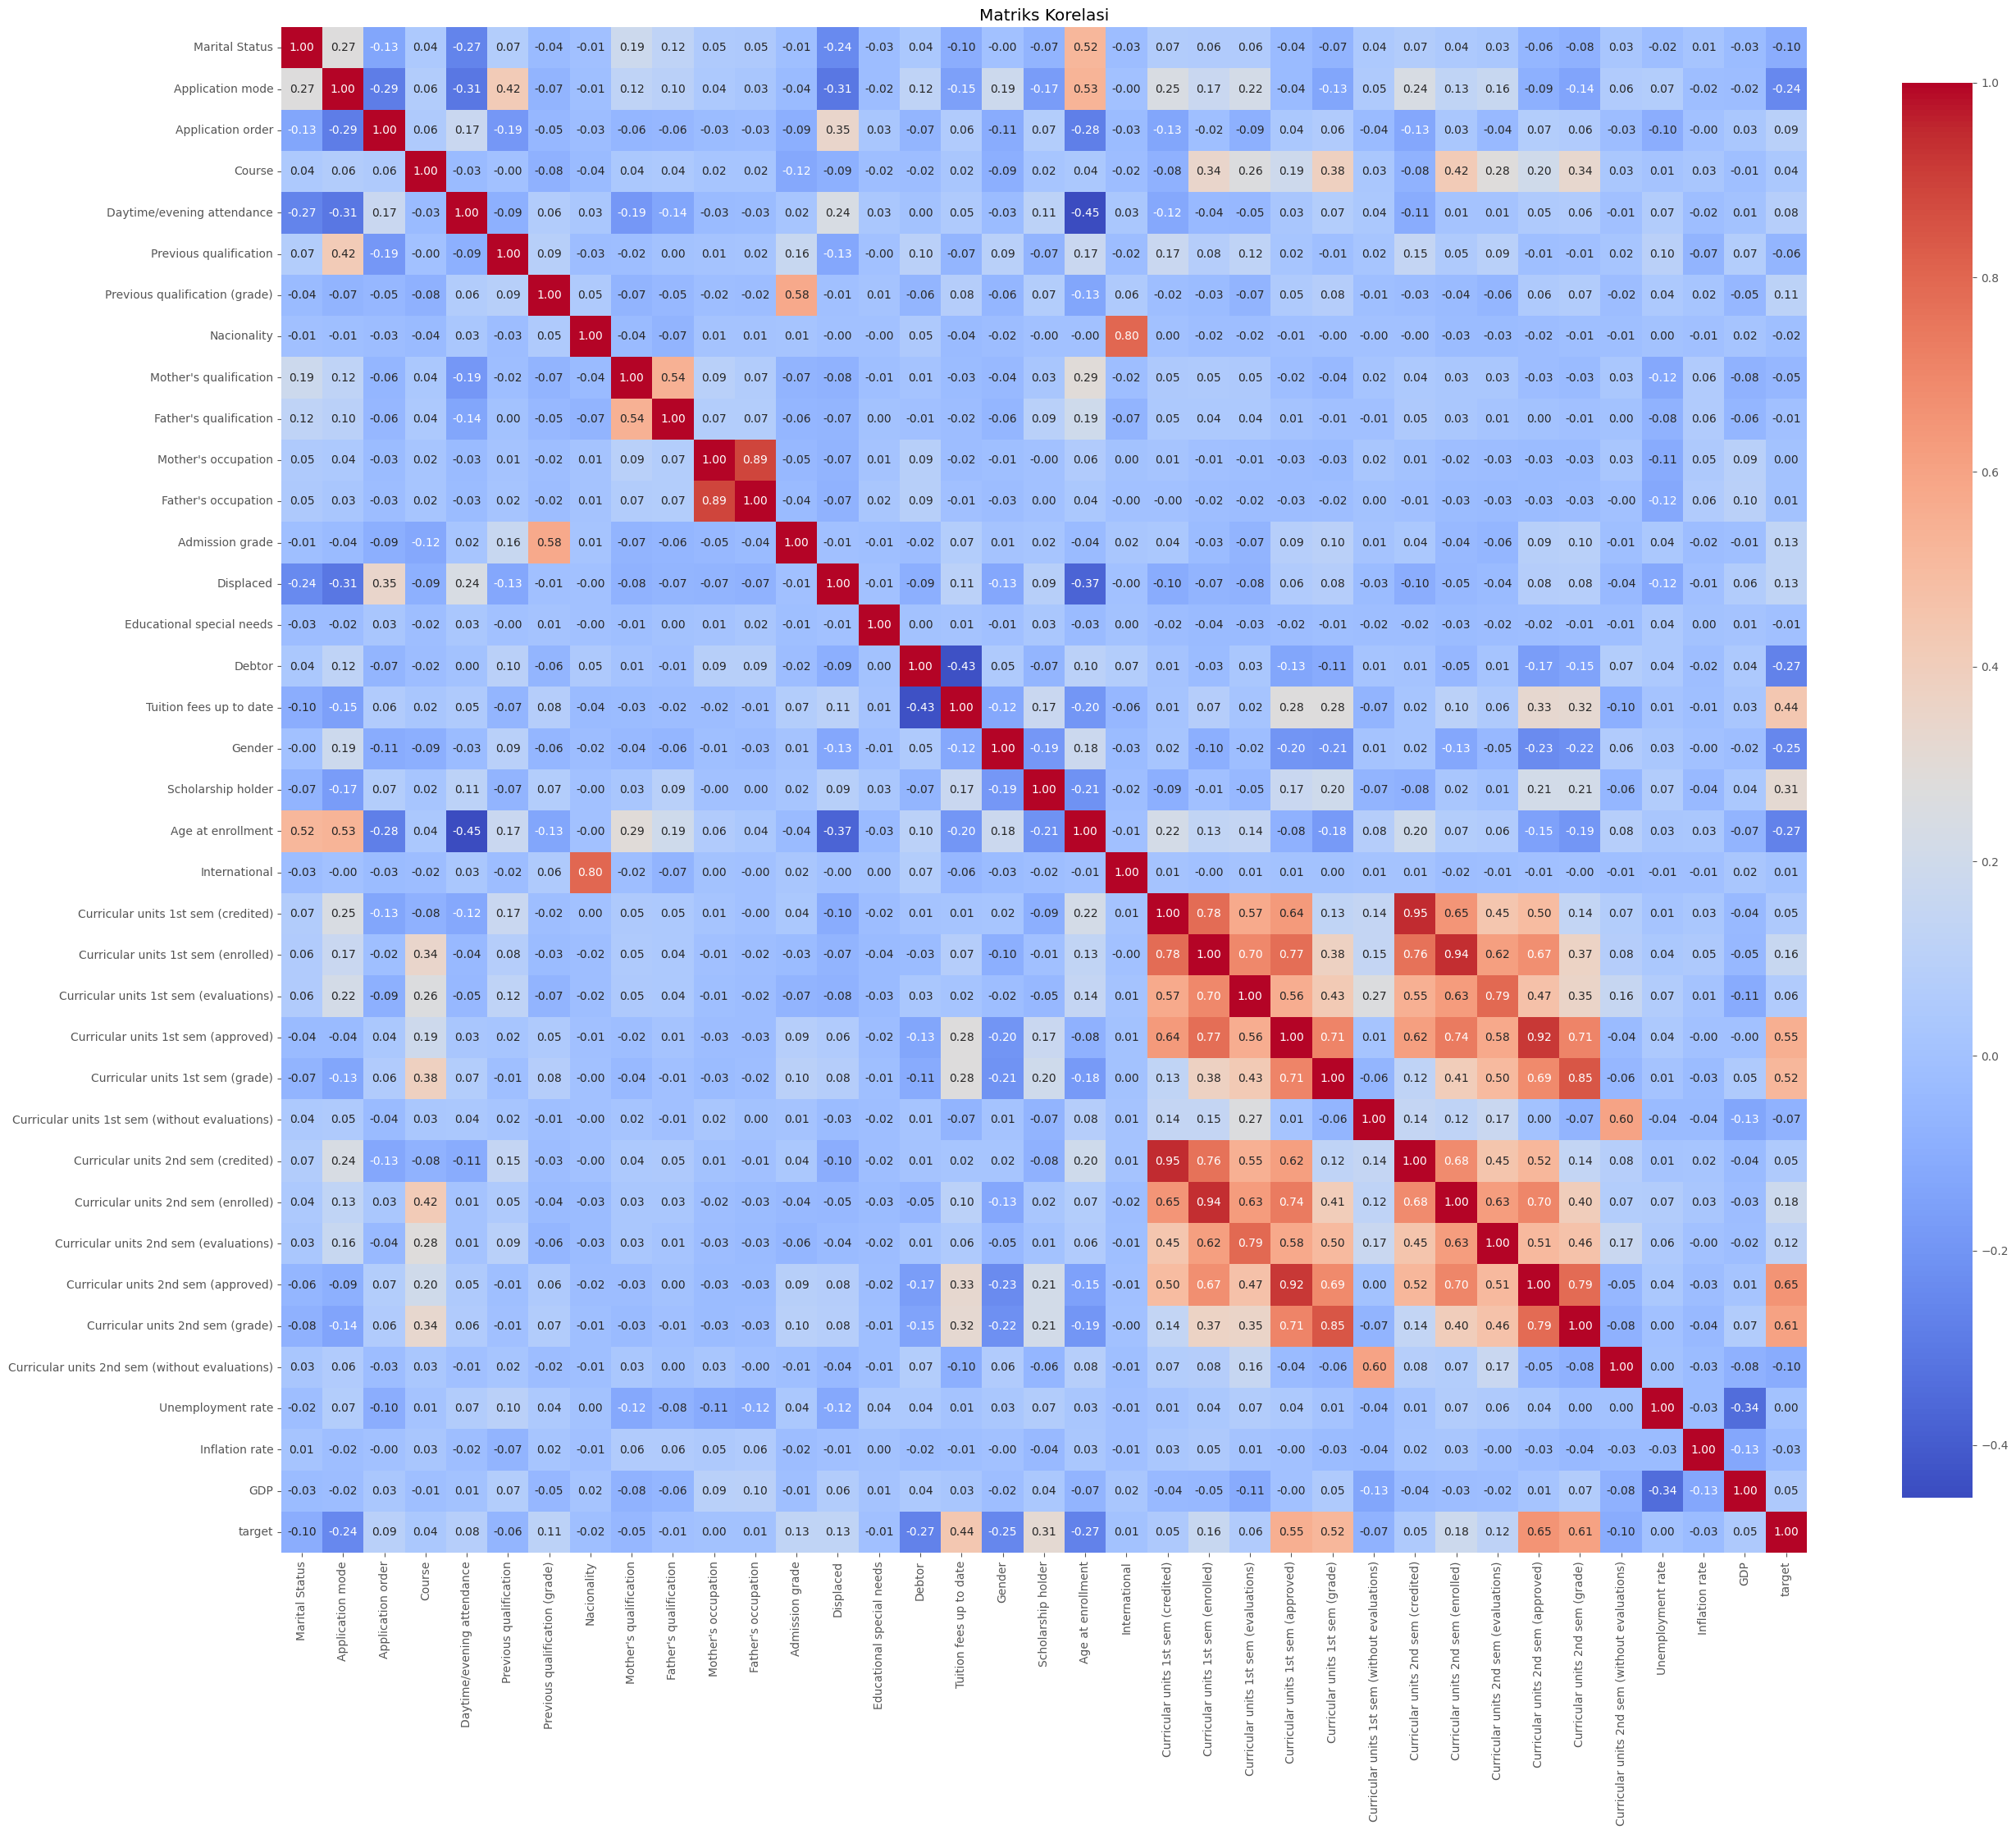


Korelasi dengan 'target':
Marital Status                                   -0.100479
Application mode                                 -0.244507
Application order                                 0.094355
Course                                            0.038135
Daytime/evening attendance                        0.084496
Previous qualification                           -0.062323
Previous qualification (grade)                    0.109464
Nacionality                                      -0.015516
Mother's qualification                           -0.053989
Father's qualification                           -0.005865
Mother's occupation                               0.000772
Father's occupation                               0.005066
Admission grade                                   0.128058
Displaced                                         0.126113
Educational special needs                        -0.007254
Debtor                                           -0.267207
Tuition fees up to date      

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

matriks_korelasi = numeric_df.corr()
print("Matriks Korelasi:")
print(matriks_korelasi)

plt.figure(figsize=(30, 28))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi')
plt.show()

korelasi_target = matriks_korelasi['target']
print("\nKorelasi dengan 'target':")
print(korelasi_target)

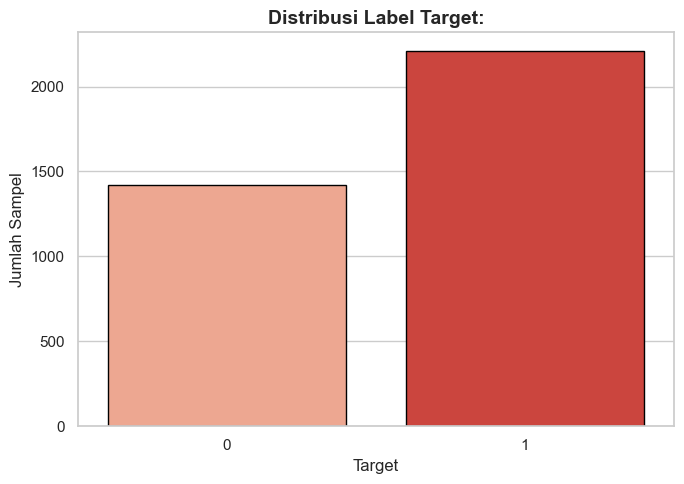

In [10]:
# Cek distribusi nilai target
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")

sns.countplot(data=df, x='target', palette='Reds', edgecolor='black')

plt.title("Distribusi Label Target:", fontsize=14, fontweight='bold')
plt.xlabel("Target", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

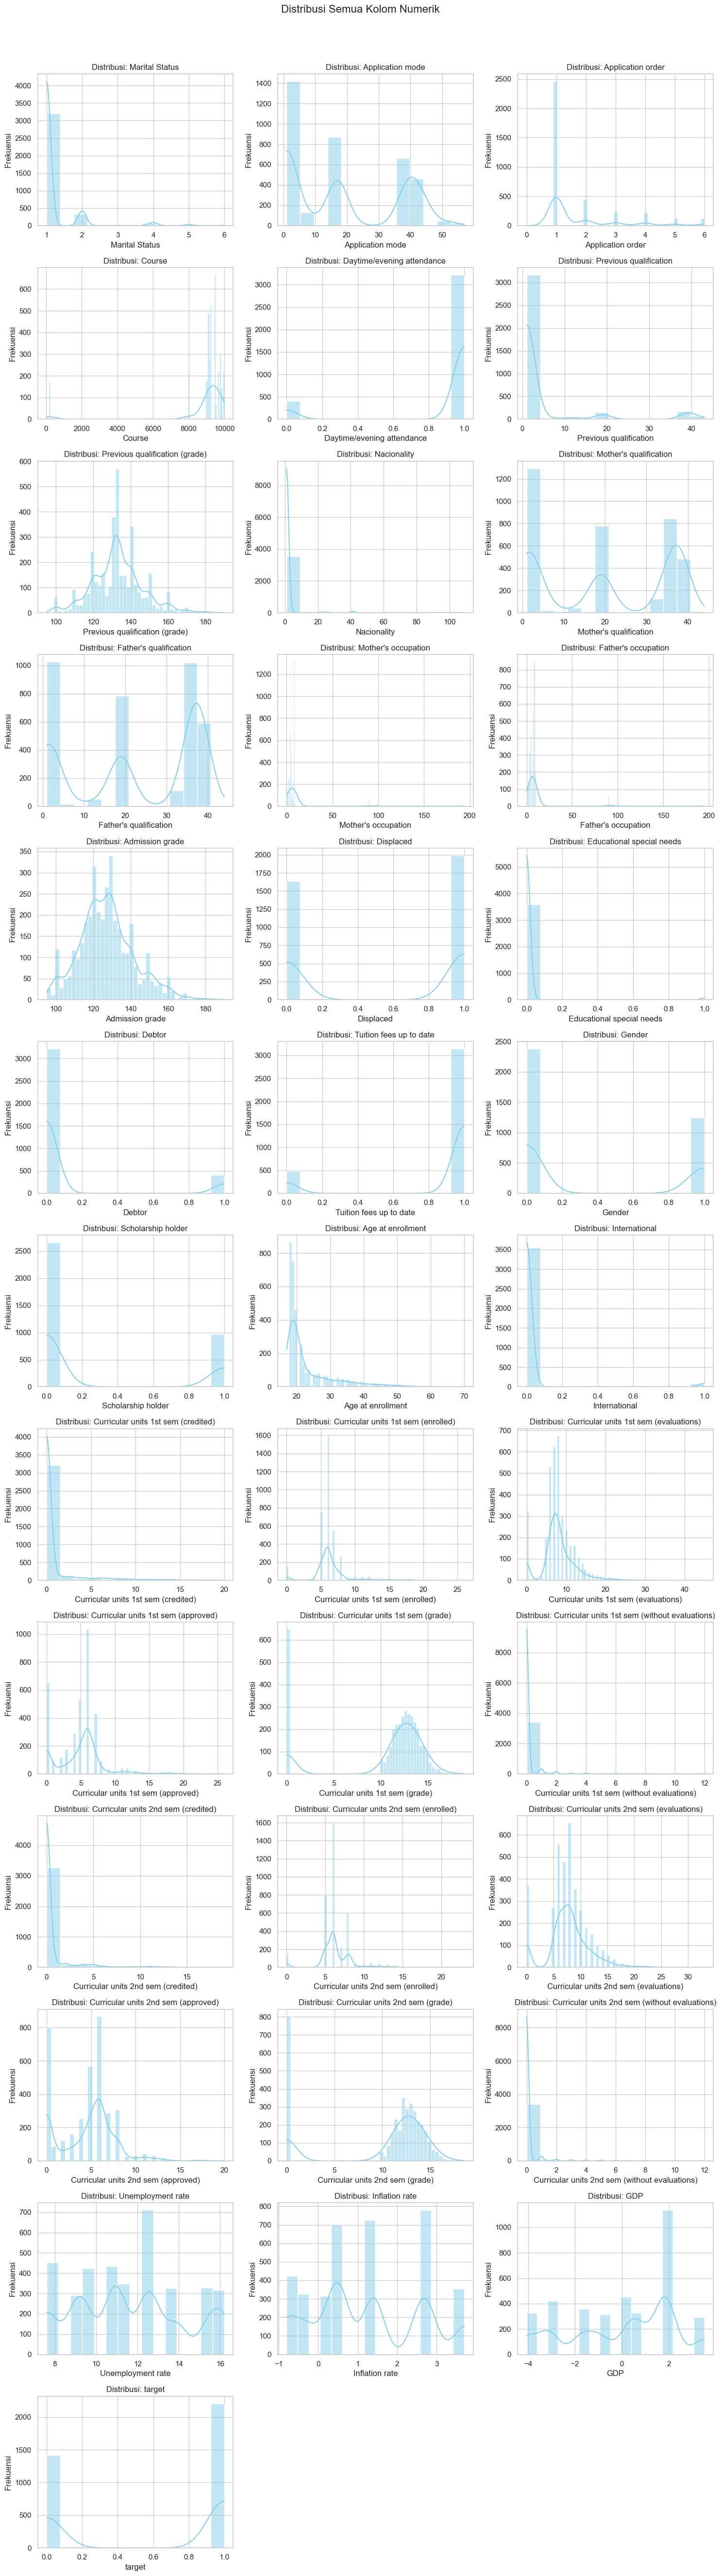

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

df_numerik = df.select_dtypes(include='number')

n_cols = 3
n_rows = math.ceil(len(df_numerik.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_numerik.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribusi Semua Kolom Numerik', fontsize=16, y=1.02)
plt.show()

DATA PREPARATION

Data Outlier

Boxplot menampilkan outlier

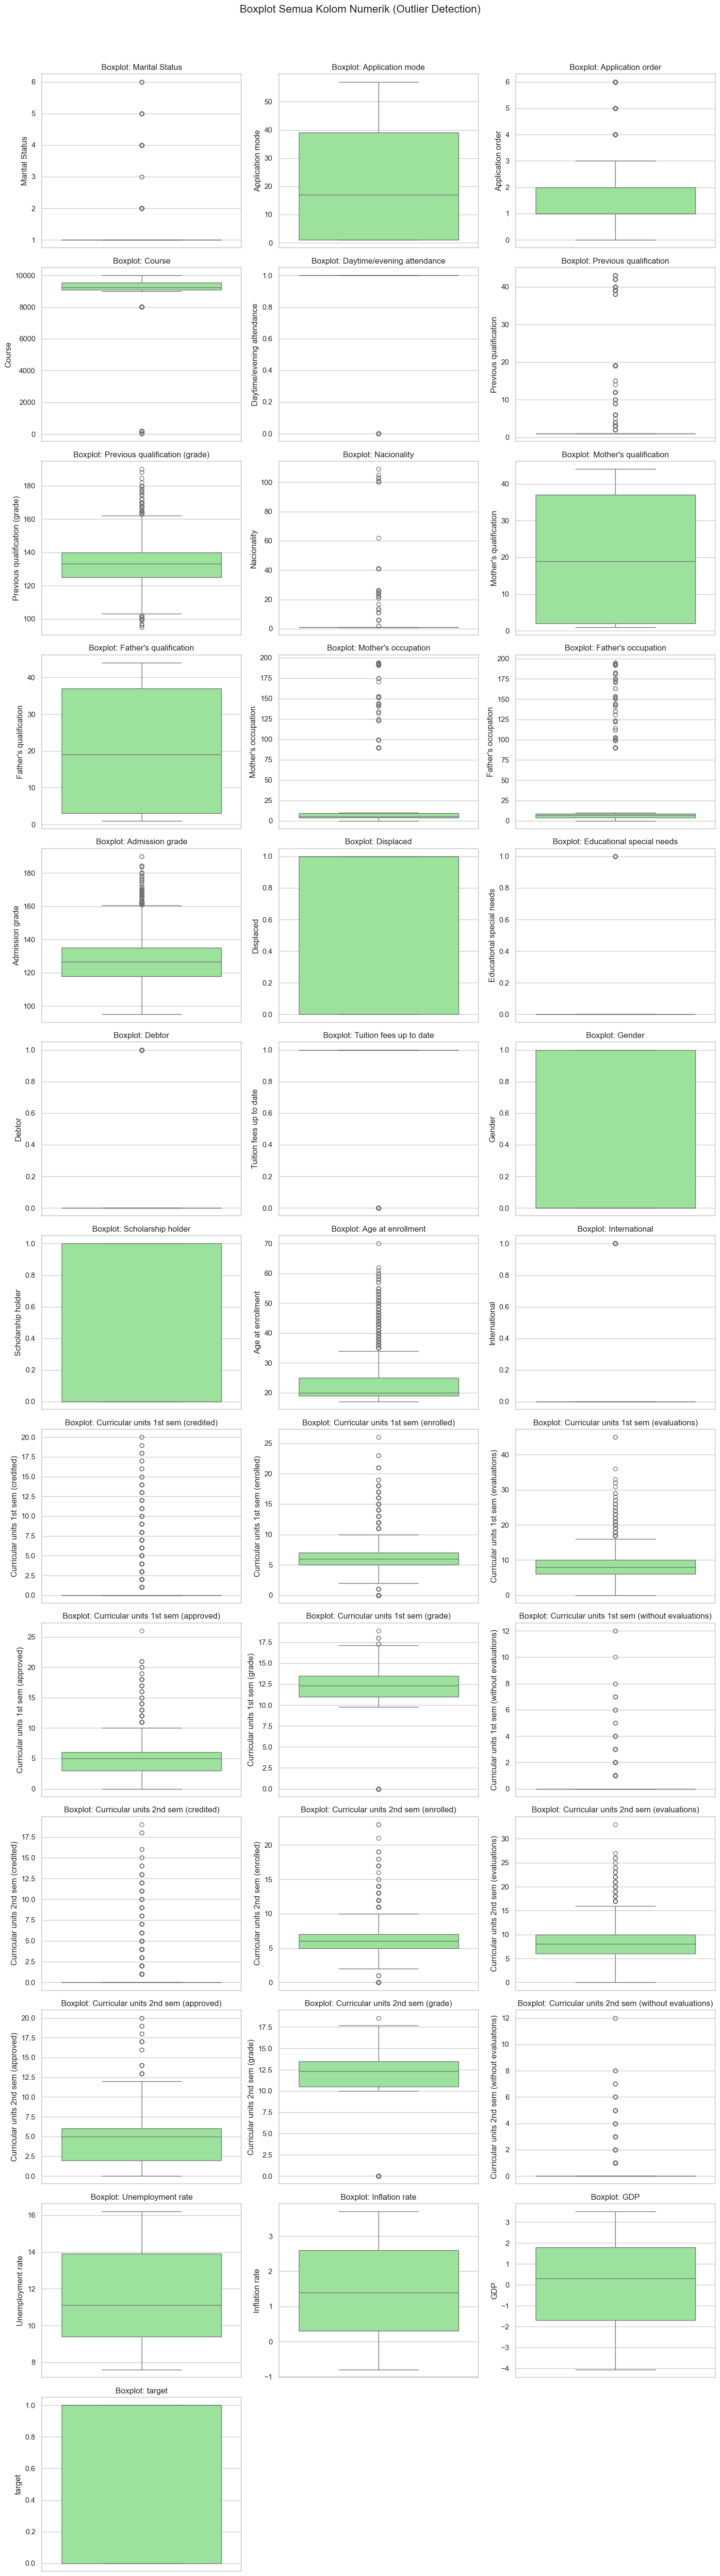

In [12]:
n_cols = 3
n_rows = math.ceil(len(df_numerik.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_numerik.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplot Semua Kolom Numerik (Outlier Detection)', fontsize=16, y=1.02)
plt.show()

Mendeteksi outlier

In [13]:
def detect_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    df['is_outlier'] = 0
    df.loc[outlier_indices, 'is_outlier'] = 1
    return df

numerical_cols = [col for col in df.select_dtypes(include='number').columns if col != 'target']
df_with_outliers = detect_outliers_iqr(df, numerical_cols)

outliers = df_with_outliers[df_with_outliers['is_outlier'] == 1]
print(f"Jumlah baris outlier: {len(outliers)}")

Jumlah baris outlier: 2455


Menghapus outlier

In [14]:

def hapus_outlier_iqr(df, cols):
    print(f"Jumlah baris sebelum hapus outlier: {len(df)}")
    mask = pd.Series([True]*len(df), index=df.index)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        mask = mask & (df[col] >= batas_bawah) & (df[col] <= batas_atas)
    df_bersih = df[mask]
    print(f"Jumlah baris setelah hapus outlier: {len(df_bersih)}")
    return df_bersih

cols = [col for col in df.select_dtypes(include='number').columns if col != 'target']
df_bersih = hapus_outlier_iqr(df, cols)

Jumlah baris sebelum hapus outlier: 3630
Jumlah baris setelah hapus outlier: 1175


Feature Engineering

Data Transformation

In [15]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = df_bersih.drop(columns='target')
y = df_bersih['target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['target'] = y.values

# Tampilkan data akhir
df_scaled.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,is_outlier,target
0,0.0,0.640831,0.717339,1.401033,0.0,0.0,-0.995891,0.0,1.309992,0.993467,...,-0.411086,1.036167,-0.527860,-0.492709,0.0,-0.907274,-1.471510,-1.424472,0.0,1
1,0.0,-0.704971,-0.668966,0.313708,0.0,0.0,0.775406,0.0,0.056646,1.058713,...,1.568529,0.026216,1.519123,0.958239,0.0,1.478844,1.127549,-1.843869,0.0,1
2,0.0,-0.704971,-0.668966,0.990797,0.0,0.0,0.509712,0.0,1.309992,-0.180969,...,-0.411086,-0.478760,-0.527860,0.850070,0.0,0.852977,-1.110529,0.320040,0.0,1
3,0.0,-0.704971,-0.668966,0.313708,0.0,0.0,0.244017,0.0,0.056646,1.058713,...,1.568529,0.026216,0.836795,0.114739,0.0,0.383577,1.777314,-0.790915,0.0,1
4,0.0,-0.704971,-0.668966,-1.339185,0.0,0.0,1.395360,0.0,1.309992,0.993467,...,-1.400893,-1.488712,-0.527860,-0.791104,0.0,-0.359641,0.116804,0.743899,0.0,1


clustering

Scaling Data

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])
df_scaled.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target,is_outlier
0,-0.300686,-0.081917,2.436822,-4.197769,0.355850,-0.352421,-0.825034,-0.124214,-0.063288,-0.692162,...,-2.782691,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119,-1.246812,0.691820
1,-0.300686,-0.197149,-0.562471,0.193388,0.355850,-0.352421,2.045805,-0.124214,-1.218383,-1.281423,...,-0.131002,-0.444817,0.468555,0.662383,-0.190148,0.850919,-1.106070,0.353704,0.802046,0.691820
2,-0.300686,-1.003777,2.436822,0.104434,0.355850,-0.352421,-0.825034,-0.124214,1.091807,0.944677,...,-0.131002,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119,-1.246812,0.691820
3,-0.300686,-0.081917,0.187353,0.444298,0.355850,-0.352421,-0.825034,-0.124214,1.155979,0.944677,...,-0.131002,0.564362,0.152293,0.431281,-0.190148,-0.836191,-1.467154,-1.376634,0.802046,-1.445462
4,1.330837,1.185642,-0.562471,-0.406087,-2.810171,-0.352421,-2.487099,-0.124214,1.091807,1.010150,...,-0.131002,-0.444817,0.468555,0.540750,-0.190148,0.850919,-1.106070,0.353704,0.802046,0.691820


*PCA*


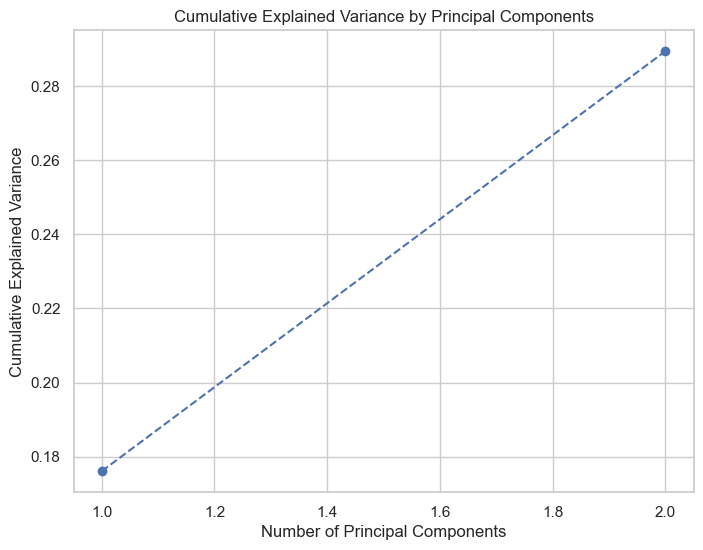

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
dfpca = pca.fit_transform(df_scaled[numeric_columns])  # Apply PCA transformation

# Step 3: Explained Variance Plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Data Reduction

In [18]:
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PCA{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print(explained_variance_df)

pca_reduced = PCA(n_components=5)
df_reduced = pca_reduced.fit_transform(df_scaled[numeric_columns])

df_reduced_df = pd.DataFrame(df_reduced, columns=[f'PC{i+1}' for i in range(5)])

print(df_reduced_df.head())

  Principal Component  Explained Variance
0                PCA1            0.176063
1                PCA2            0.113396
        PC1       PC2       PC3       PC4       PC5
0 -6.010651 -0.601776 -1.425932  0.741984  0.016766
1 -0.074486 -1.004358 -1.823588 -0.448918  1.300794
2 -4.116043  0.511813 -0.442166  1.510222 -1.726577
3  0.768374 -1.425884  0.853910 -0.335442 -1.337085
4  0.246741  2.215596  2.662534 -2.156290  0.404527


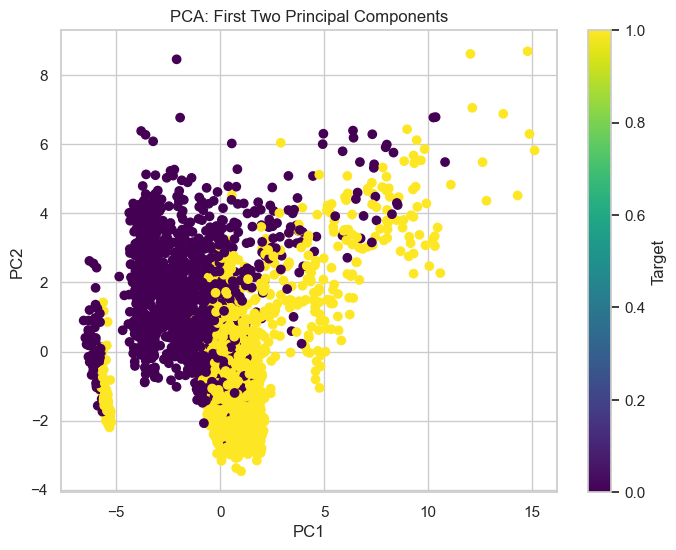

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced_df['PC1'], df_reduced_df['PC2'], c=df['target'], cmap='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_scaled[numeric_columns], test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 2904
Jumlah data uji: 726


## Unsupervised Learning

Elbow Method

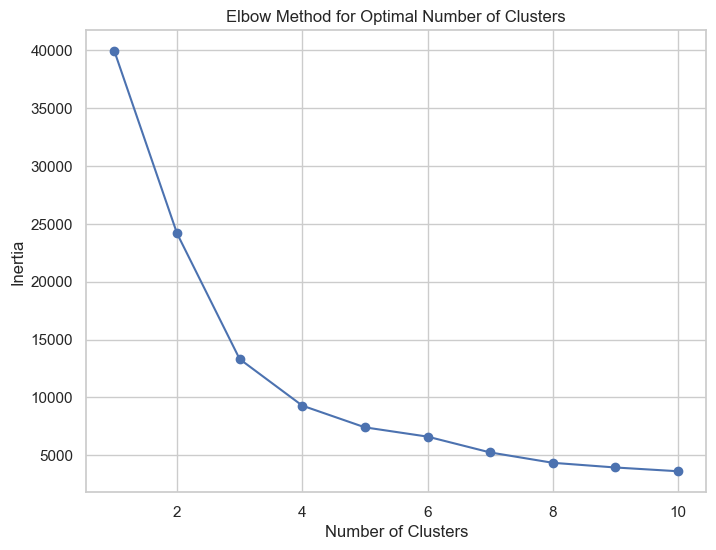

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced_df[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


cluster dengan silhoutte score terbaik

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11) # Sesuaikan range ini jika Anda menguji jumlah cluster yang berbeda

print("Silhouette Scores untuk Berbagai Jumlah Cluster:")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Tambahkan n_init
    kmeans.fit(dfpca) # Gunakan data hasil PCA
    score = silhouette_score(dfpca, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"  - Untuk k = {k}: {score:.4f}")

# Plot Silhouette Scores (opsional, tapi membantu visualisasi)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Mencari jumlah cluster dengan Silhouette Score terbaik
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"\nJumlah cluster terbaik berdasarkan Silhouette Score: {best_k}")
print(f"Silhouette Score terbaik: {best_score:.4f}")

Silhouette Scores untuk Berbagai Jumlah Cluster:


NameError: name 'silhouette_score' is not defined

Pelatihan Model K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dfpca)

dfpca_df = pd.DataFrame(dfpca, columns=['PC1', 'PC2'])
dfpca_df['Cluster'] = kmeans.labels_

dfpca_df.head()

,PC1,PC2,Cluster
0,-6.010651,-0.601776,0
1,-0.074486,-1.004358,1
2,-4.116043,0.511813,0
3,0.768374,-1.425884,1
4,0.246741,2.215596,0


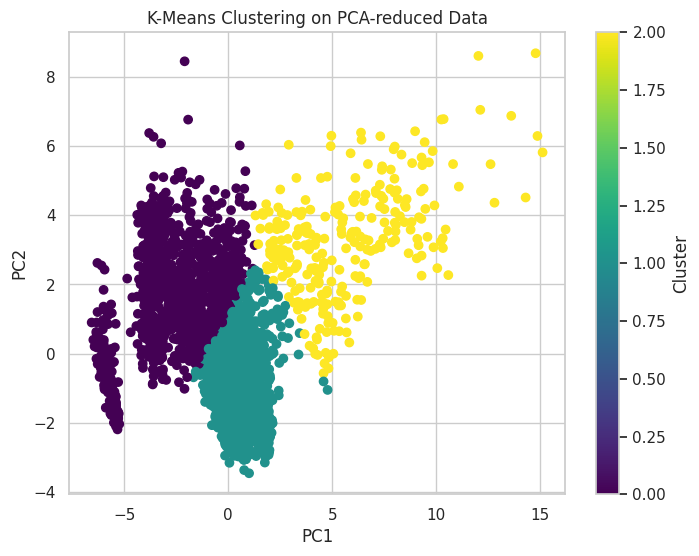

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dfpca_df['PC1'], dfpca_df['PC2'], c=dfpca_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on PCA-reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Gabungkan hasil cluster ke data asli (reset index agar bisa digabung)
df_with_clusters = df.reset_index(drop=True).copy()
if 'Optimal_Cluster' in dfpca_df.columns:
    df_with_clusters['Optimal_Cluster'] = dfpca_df['Optimal_Cluster'].values
else:
    df_with_clusters['Optimal_Cluster'] = dfpca_df['Cluster'].values

if 'df_with_clusters' in locals() and 'Optimal_Cluster' in df_with_clusters.columns:

    print("Ringkasan Rata-rata Kolom Numerik per Cluster:")

    numeric_cols_for_analysis = df_with_clusters.select_dtypes(include=['number']).columns.tolist()
    if 'target' in numeric_cols_for_analysis:
        numeric_cols_for_analysis.remove('target')
    if 'is_outlier' in numeric_cols_for_analysis:
        numeric_cols_for_analysis.remove('is_outlier')
    if 'Optimal_Cluster' in numeric_cols_for_analysis:
        numeric_cols_for_analysis.remove('Optimal_Cluster')


    cluster_means = df_with_clusters.groupby('Optimal_Cluster')[numeric_cols_for_analysis].mean()

    print(cluster_means.T)


    if 'target' in df_with_clusters.columns:
        print("\nDistribusi Persentase Target per Cluster:")
        cluster_target_distribution = df_with_clusters.groupby('Optimal_Cluster')['target'].value_counts(normalize=True).unstack(fill_value=0)

        cluster_target_distribution_formatted = cluster_target_distribution.applymap(lambda x: f"{x:.2%}")

        print(cluster_target_distribution_formatted)

else:
    print("DataFrame 'df_with_clusters' dengan kolom 'Optimal_Cluster' tidak tersedia. Mohon pastikan langkah sebelumnya berhasil dijalankan.")

Ringkasan Rata-rata Kolom Numerik per Cluster:
Optimal_Cluster                                        0         1         2
Marital Status                                 -0.226627  0.339480  0.348284
Application mode                               -0.339486  0.432626  0.854723
Application order                               0.172913 -0.216790 -0.450973
Course                                          0.240543 -0.378150 -0.291472
Daytime/evening attendance                      0.233913 -0.309551 -0.538639
Previous qualification                         -0.125061  0.116935  0.501027
Previous qualification (grade)                  0.073936 -0.116781 -0.087188
Nacionality                                    -0.012660  0.027183 -0.016594
Mother's qualification                         -0.110395  0.157181  0.205566
Father's qualification                         -0.072430  0.089026  0.196721
Mother's occupation                            -0.045929  0.076721  0.035835
Father's occupation          

Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(dfpca, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5346514914730431


Hyperparameter Tuning

Setelah tuning

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_init': 10, 'tol': 0.0001}
Best Silhouette Score: 0.5345593164422263


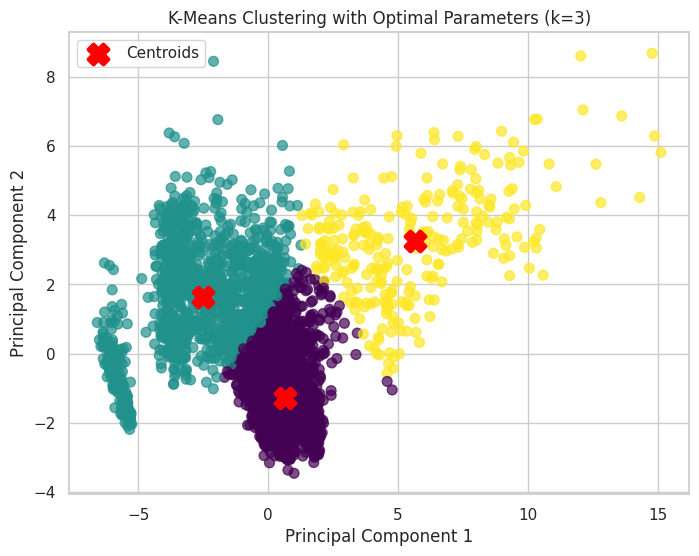

In [ ]:
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [100, 300, 500],
    'tol': [1e-4, 1e-3, 1e-2]
}

kmeans = KMeans(n_clusters=3, random_state=42)

def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)
    if len(np.unique(labels)) < 2:
        return -1
    return silhouette_score(X, labels)

grid_search = GridSearchCV(
    estimator=kmeans,
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(dfpca)

print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

best_kmeans_model = grid_search.best_estimator_
cluster_labels = best_kmeans_model.labels_

if 'dfpca_df' not in locals():
    dfpca_df = pd.DataFrame(dfpca, columns=[f'PC{i+1}' for i in range(dfpca.shape[1])])

dfpca_df['Optimal_Cluster'] = cluster_labels
centroids = best_kmeans_model.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(dfpca_df.iloc[:, 0], dfpca_df.iloc[:, 1], c=dfpca_df['Optimal_Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', label='Centroids')

plt.title(f'K-Means Clustering with Optimal Parameters (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Supervised Learning

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train_scaled, y_train)

y_train_pred = logreg.predict(X_train_scaled)

y_test_pred = logreg.predict(X_test_scaled)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9177489177489178
Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       995
           1       0.91      0.96      0.93      1546

    accuracy                           0.92      2541
   macro avg       0.92      0.91      0.91      2541
weighted avg       0.92      0.92      0.92      2541


Test Accuracy: 0.9118457300275482
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       426
           1       0.90      0.96      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.90      0.91      1089
weighted avg       0.91      0.91      0.91      1089



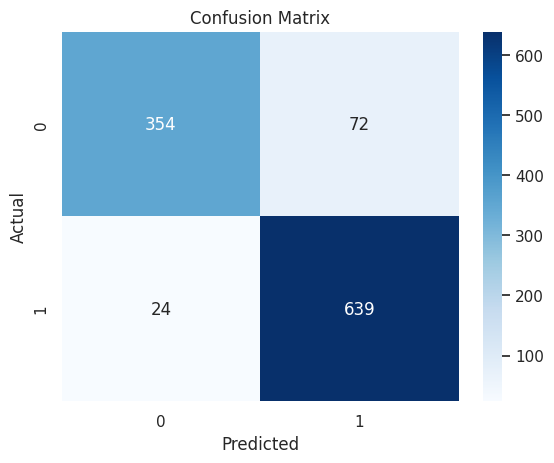

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Koefisien Model:
                                           Feature  Coefficient
30             Curricular units 2nd sem (approved)     3.059607
24             Curricular units 1st sem (approved)     2.100178
16                         Tuition fees up to date     0.879561
31                Curricular units 2nd sem (grade)     0.705501
20                                   International     0.533174
10                             Mother's occupation     0.354243
18                              Scholarship holder     0.332179
5                           Previous qualification     0.271287
32  Curricular units 2nd sem (without evaluations)     0.179134
0                                   Marital Status     0.158060
23          Curricular units 1st sem (evaluations)     0.118915
9                           Father's qualification     0.102160
36                                      is_outlier     0.066773
26  Curricular units 1st sem (without evaluations)     0.045007
34                    

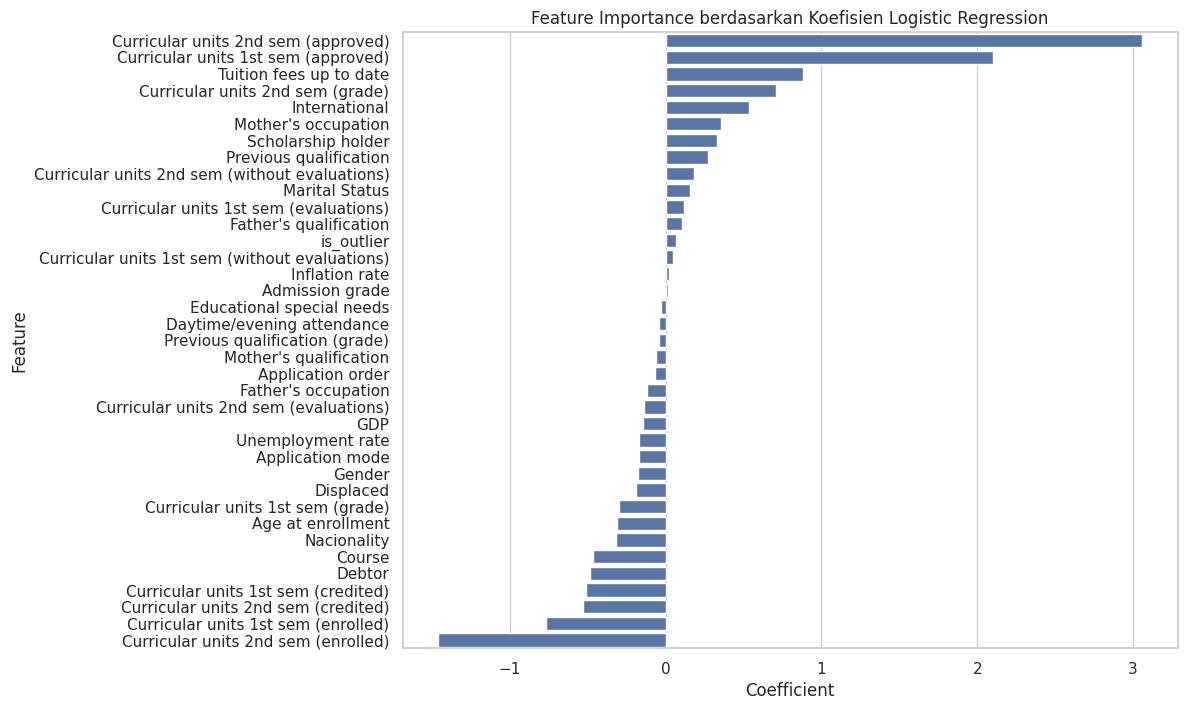

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nKoefisien Model:")
print(coefficients)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance berdasarkan Koefisien Logistic Regression')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_logreg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_test_pred_best = best_logreg.predict(X_test_scaled)
print("\nBest Model Test Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("Best Model Test Classification Report:")
print(classification_report(y_test, y_test_pred_best))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Best Model Test Accuracy: 0.9136822773186409
Best Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       426
           1       0.90      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.90      0.91      1089
weighted avg       0.92      0.91      0.91      1089



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
import numpy as np

# Definisikan metrik evaluasi tambahan
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

In [ ]:
# Definisikan parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 2000],
    'class_weight': [None, 'balanced'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

# Hanya gunakan parameter yang kompatibel
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],  # Hanya solver yang mendukung L1 penalty
    'max_iter': [1000],
    'class_weight': [None, 'balanced']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Jalankan grid search
grid_search.fit(X_train_scaled, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluasi model terbaik
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'C': np.float64(0.23357214690901212), 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.9157890258806057

Test Accuracy: 0.9109274563820018
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       426
           1       0.90      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089



In [ ]:
# Optimasi untuk recall (meminimalkan false negatives)
recall_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid={
        'C': np.logspace(-3, 3, 7),
        'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
    },
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

recall_grid.fit(X_train_scaled, y_train)
print("\nBest Parameters for Recall:", recall_grid.best_params_)
print("Best Recall Score:", recall_grid.best_score_)

# Optimasi untuk precision (meminimalkan false positives)
precision_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid={
        'C': np.logspace(-3, 3, 7),
        'class_weight': [None, 'balanced', {0: 2, 1: 1}, {0: 3, 1: 1}]
    },
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)

precision_grid.fit(X_train_scaled, y_train)
print("\nBest Parameters for Precision:", precision_grid.best_params_)
print("Best Precision Score:", precision_grid.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best Parameters for Recall: {'C': np.float64(0.001), 'class_weight': {0: 1, 1: 3}}
Best Recall Score: 0.9954692556634305
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best Parameters for Precision: {'C': np.float64(0.1), 'class_weight': {0: 3, 1: 1}}
Best Precision Score: 0.9372750088897641



Grid Search Results:
                                                                                                              params  \
67             {'C': 0.23357214690901212, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}   
66        {'C': 0.23357214690901212, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}   
59             {'C': 0.08858667904100823, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}   
75               {'C': 0.615848211066026, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}   
83               {'C': 1.623776739188721, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}   
70  {'C': 0.23357214690901212, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}   
74          {'C': 0.615848211066026, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}   
64        {'C': 0.

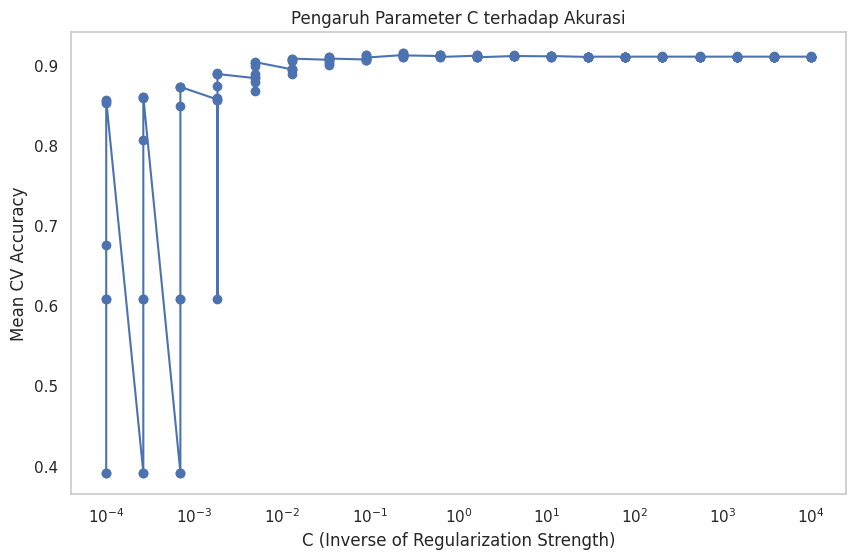

In [ ]:
# Analisis hasil grid search
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results:")
print(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10))

# Visualisasi pengaruh parameter C
plt.figure(figsize=(10, 6))
plt.semilogx(results['param_C'], results['mean_test_score'], 'o-')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean CV Accuracy')
plt.title('Pengaruh Parameter C terhadap Akurasi')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_logreg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_test_pred_best = best_logreg.predict(X_test_scaled)
print("\nBest Model Test Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("Best Model Test Classification Report:")
print(classification_report(y_test, y_test_pred_best))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Best Model Test Accuracy: 0.9136822773186409
Best Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       426
           1       0.90      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.90      0.91      1089
weighted avg       0.92      0.91      0.91      1089



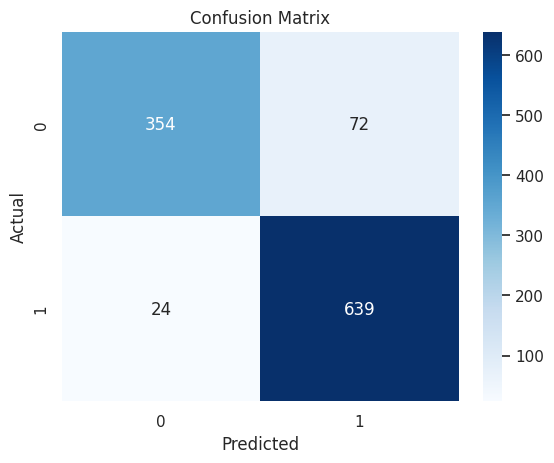

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

load data

In [ ]:
df = pd.read_csv('students_dropout_academic_success_terbaru.csv')

memilih feature dan target

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

mengisi missing values and scale features

In [ ]:
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

split data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

prediksi probabilitas ROC

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

menghitung ROC dan AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

visualisasi ROC

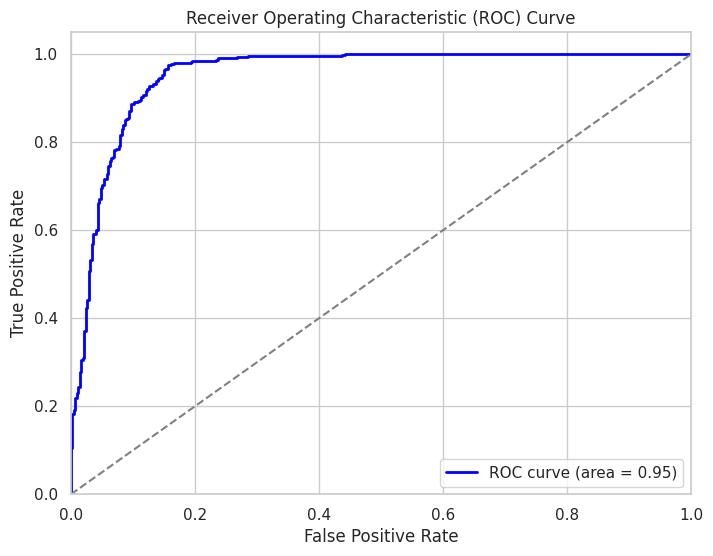

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

visualisasi sebelum dan sesduah tuning

<Figure size 1400x1000 with 0 Axes>

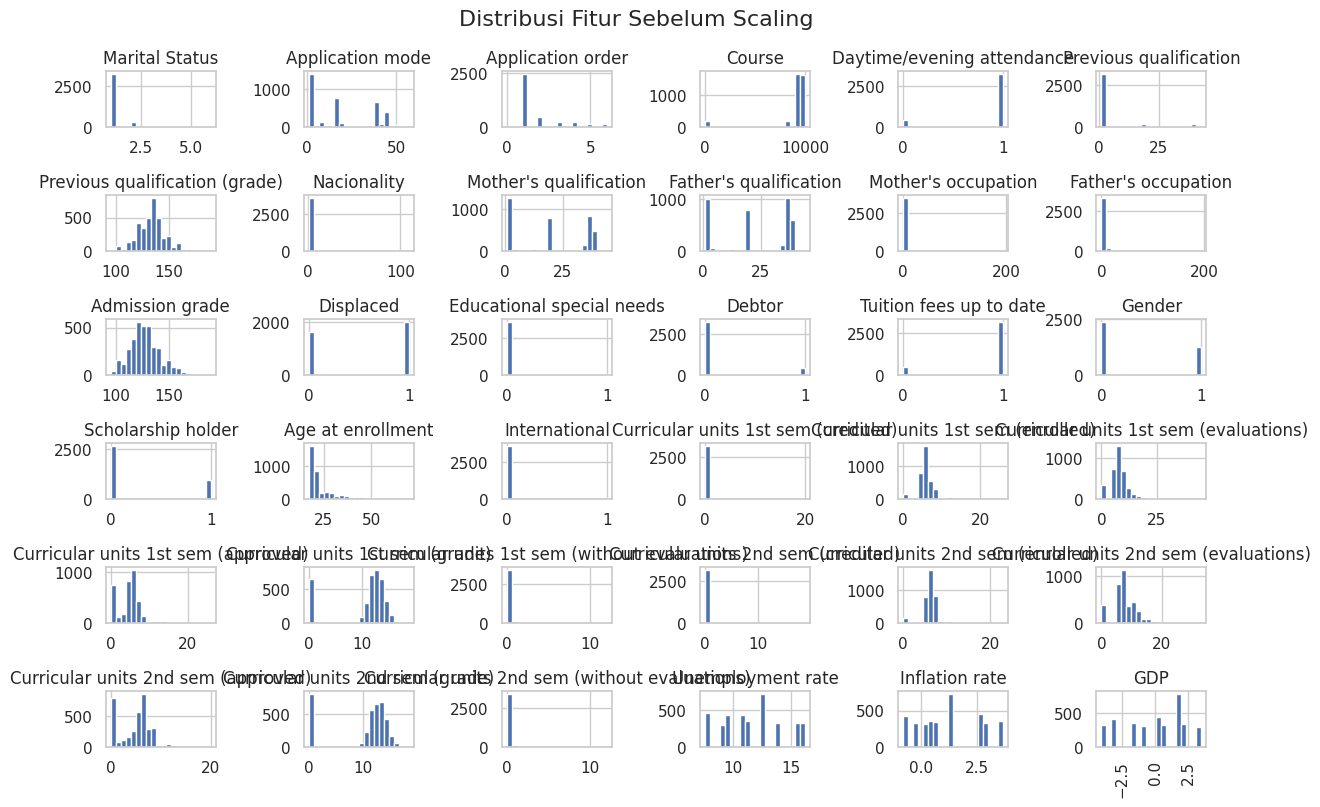

<Figure size 1400x1000 with 0 Axes>

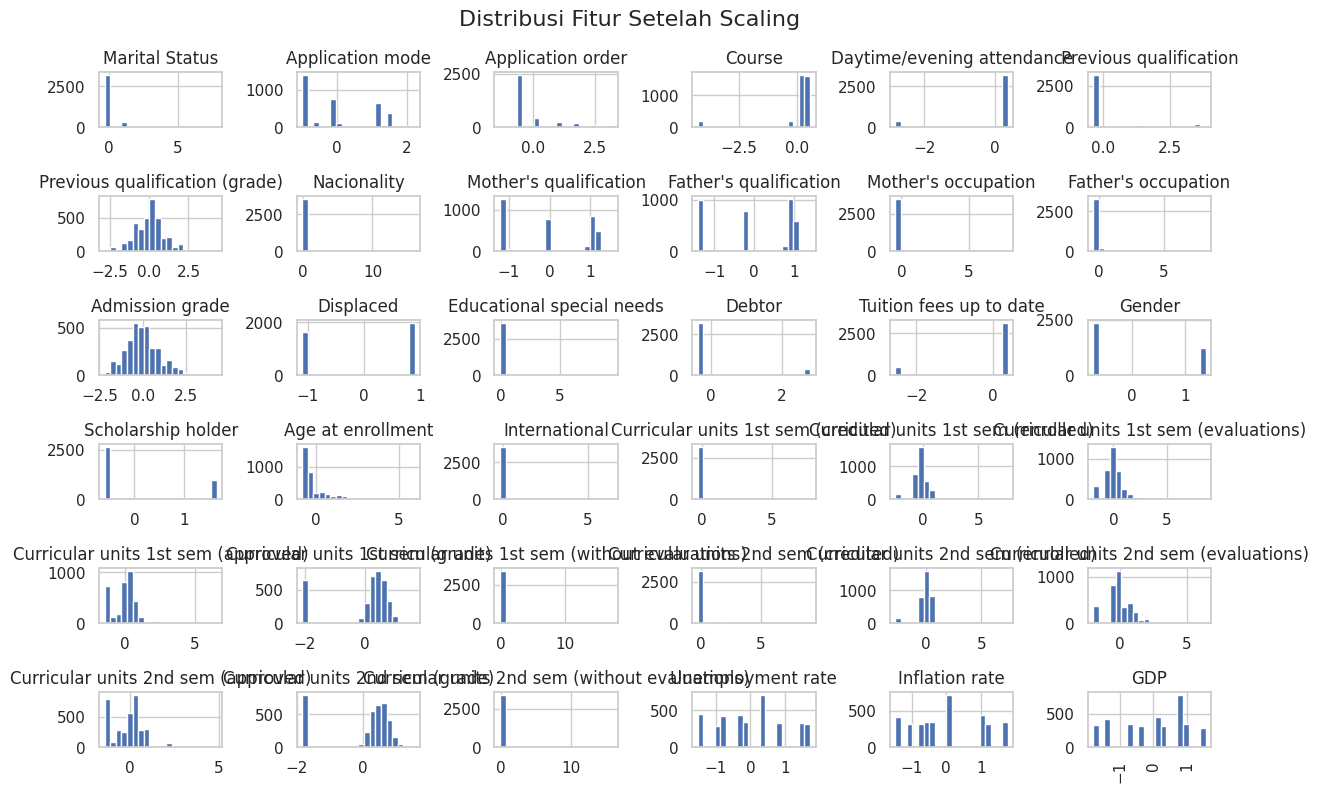

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('students_dropout_academic_success_terbaru.csv')

# Select features (only numerical columns for simplicity)
X = data.drop(columns=['target'])


plt.figure(figsize=(14, 10))
X_before_scaled = X.copy()


X_before_scaled.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribusi Fitur Sebelum Scaling', fontsize=16)
plt.tight_layout()


plt.xticks(rotation=90)
plt.show()


X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Plot histograms of scaled data (after scaling)
plt.figure(figsize=(14, 10))
X_scaled_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribusi Fitur Setelah Scaling', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

confussion matrix sebelum dan sesudah tuning

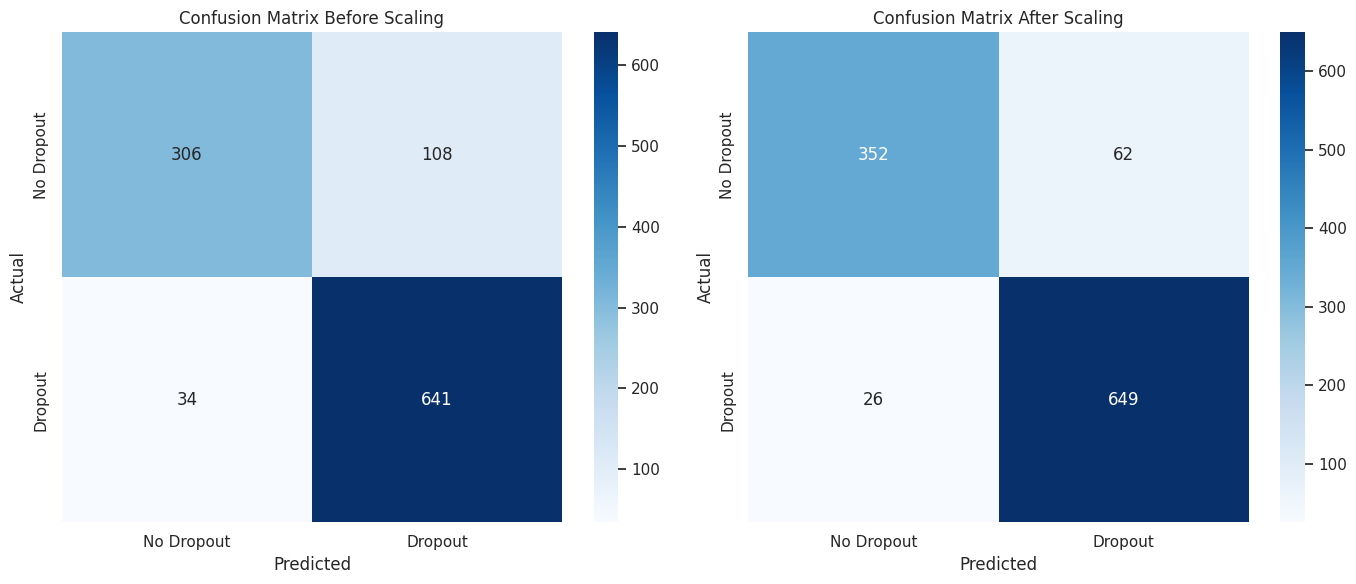

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns


data = pd.read_csv('students_dropout_academic_success_terbaru.csv')


X = data.drop(columns=['target'])
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(random_state=42)


model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)


cm_before = confusion_matrix(y_test, y_pred_before)


X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model.fit(X_train_scaled, y_train)
y_pred_after = model.predict(X_test_scaled)


cm_after = confusion_matrix(y_test, y_pred_after)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # First subplot
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
plt.title('Confusion Matrix Before Scaling')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.subplot(1, 2, 2)  # Second subplot
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
plt.title('Confusion Matrix After Scaling')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Deployment

In [ ]:
#Simpan model

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib

# Load data
df = pd.read_csv("students_dropout_academic_success_terbaru.csv")
X = df.drop(columns="target")
y = df["target"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Save model and scaler
joblib.dump(model, 'model_dropout.pkl')
joblib.dump(scaler, 'scaler_dropout.pkl')
print("Model dan scaler berhasil disimpan.")

In [ ]:
#Konfigurasi token

!ngrok config add-authtoken 2wqNo9X013UJyUupiuP0VCFHdOm_2dC54LzmZ4ZUxeGJbiA8j

In [24]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

# --------------------- PAGE CONFIG & STYLING ---------------------
st.set_page_config(page_title="🎓 Dropout Risk Prediction", layout="wide")

st.markdown("""
    <style>
    html, body, .stApp {
        background-color: #f8f9fa !important;
        color: #212529 !important;
        font-family: 'Segoe UI', sans-serif;
    }
    h1, h2, h3, h4 {
        color: #0d6efd !important;
    }
    .stButton>button {
        background-color: #0d6efd !important;
        color: white !important;
        border-radius: 0.5rem;
        padding: 0.75rem 1.5rem;
        font-size: 1rem;
    }
    .stDataFrame, .stTable {
        background-color: white !important;
        color: #212529 !important;
    }
    .block-container {
        padding: 2rem 3rem;
    }
    .css-1d391kg, .css-1v0mbdj {
        padding: 2rem 2rem;
    }
    .stSidebar {
        background-color: #ffffff !important;
        border-right: 1px solid #dee2e6;
    }
    </style>
""", unsafe_allow_html=True)

# --------------------- LOAD DATA ---------------------
@st.cache_data
def load_data():
    return pd.read_csv("students_dropout_academic_success_terbaru.csv")

df = load_data()

# --------------------- MAPPING KATEGORI ---------------------
category_mappings = {
    'Marital Status': {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto union',
        6: 'Legally separated'
    },
    'Daytime/evening attendance': {
        1: 'Daytime',
        2: 'Evening'
    },
    'Gender': {
        1: 'Female',
        2: 'Male'
    },
    'Scholarship holder': {
        1: 'No',
        2: 'Yes'
    },
    'Displaced': {
        1: 'No',
        2: 'Yes'
    },
    'Debtor': {
        1: 'No',
        2: 'Yes'
    },
    'Educational special needs': {
        1: 'No',
        2: 'Yes'
    },
    'International': {
        1: 'No',
        2: 'Yes'
    },
    'Tuition fees up to date': {
        1: 'Yes',
        2: 'No'
    }
}

try:
    model = joblib.load("model_dropout.pkl")
    scaler = joblib.load("scaler_dropout.pkl")
except:
    model, scaler = None, None

# --------------------- SIDEBAR ---------------------
st.sidebar.image("https://img.freepik.com/free-vector/education-logo-template_1061-28.jpg", width=200)
menu = st.sidebar.radio("Navigasi", [
    "🏠 Home", "📈 Business Understanding", "🔍 Data Understanding",
    "📊 Data Exploration", "🧹 Data Preparation",
    "📉 Modeling & Evaluation", "🧪 Prediksi Dropout", "📍 Clustering Mahasiswa"
])

# --------------------- HOME ---------------------
if menu == "🏠 Home":
    st.markdown("""
    <div style='text-align:center;'>
        <h1>DASHBOARD DETEKSI RISIKO DROPOUT MAHASISWA</h1>
        <p style='font-size:18px;'>"Analisis Risiko Dropout Mahasiswa Berdasarkan Data Akademik dan Sosial"</p>
    </div>
    """, unsafe_allow_html=True)

    with st.expander("👥 Anggota Kelompok 7 - SI4709"):
        anggota = {
            "Aurellia Verly": "102022330371",
            "Bagas Haris Saputro": "102022300291",
            "Cheisya Valda Wibawaningrum": "102022330316",
            "Naufal Athalino Bakti": "102022300239"
        }
        st.table(pd.DataFrame(anggota.items(), columns=["Nama", "NIM"]))

# --------------------- BUSINESS UNDERSTANDING ---------------------
elif menu == "📈 Business Understanding":
    st.header("Business Understanding")

    st.markdown("""
    ### 🔵 Risiko Dropout
    Risiko dropout merupakan ancaman signifikan dalam dunia pendidikan tinggi yang dapat memengaruhi efektivitas pembelajaran, alokasi sumber daya, dan citra institusi.
    Mahasiswa yang keluar tanpa menyelesaikan studinya dapat disebabkan oleh banyak faktor, termasuk tekanan akademik, sosial, hingga kondisi ekonomi.

    > Risiko dropout dapat menghambat keberhasilan akademik dan efisiensi operasional universitas. Oleh karena itu, sangat penting untuk melakukan deteksi dini dan intervensi.
    """)

    st.markdown("""
    ### 🎯 Tujuan Proyek
    Proyek ini bertujuan untuk membangun sistem prediksi berbasis machine learning yang mampu mengidentifikasi mahasiswa dengan risiko tinggi untuk dropout.
    Model klasifikasi digunakan untuk mengolah data akademik dan demografis mahasiswa seperti nilai, status pembayaran, usia, jenis kelamin, dan lainnya.

    > Dengan sistem ini, diharapkan institusi dapat mengurangi angka dropout melalui intervensi yang lebih terarah dan akurat.
    """)

    st.markdown("""
    ### 🔍 Aspek Penting Proyek
    - **Identifikasi Risiko**: Menganalisis pola historis yang berkaitan dengan perilaku dropout mahasiswa.
    - **Optimalisasi Intervensi**: Mengarahkan sumber daya ke mahasiswa yang benar-benar membutuhkan.
    - **Pengambilan Keputusan**: Memberikan insight berbasis data kepada manajemen kampus.

    > Pemahaman mendalam terhadap risiko dropout membantu institusi mengelola populasi mahasiswa secara lebih efektif.
    """)

    st.markdown("""
    ### 🧩 Manfaat untuk Institusi dan Stakeholder
    - **Kampus**: Meningkatkan retensi, efisiensi beasiswa, dan perencanaan akademik.
    - **Mahasiswa**: Mendapatkan bantuan dan perhatian lebih awal sebelum risiko meningkat.
    - **Dosen & Penasihat Akademik**: Memiliki alat bantu berbasis data untuk memberikan bimbingan yang lebih akurat.
    """)

    st.markdown("""
    ### 📊 Nilai Keberhasilan Model
    Keberhasilan sistem ini dievaluasi berdasarkan:
    - **Akurasi Model**: Seberapa tepat model mengklasifikasikan mahasiswa yang dropout dan tidak.
    - **Recall & F1-Score**: Seberapa baik sistem mengenali mahasiswa yang benar-benar dropout.
    - **Kemampuan Generalisasi**: Adaptabilitas model terhadap data dari berbagai jurusan dan angkatan.
    """)

# --------------------- DATA UNDERSTANDING ---------------------
elif menu == "🔍 Data Understanding":
    st.title("Data Understanding")
    st.subheader("🔹 Informasi Umum Dataset")
    st.write(f"Dataset terdiri dari **{df.shape[0]} baris** dan **{df.shape[1]} kolom**.")
    st.subheader("🔹 Tipe Data")
    st.dataframe(df.dtypes.reset_index().rename(columns={0: "Tipe", "index": "Kolom"}))
    st.subheader("🔹 Missing Values")
    missing = df.isnull().sum()
    st.dataframe(missing[missing > 0].reset_index().rename(columns={0: "Jumlah Missing", "index": "Kolom"}))

# --------------------- DATA EXPLORATION ---------------------
elif menu == "📊 Data Exploration":
    st.title("Eksplorasi Data")
    st.subheader("🔸 Korelasi dengan Target")
    st.dataframe(df.corr(numeric_only=True)['target'].sort_values(ascending=False))
    st.subheader("🔸 Heatmap Korelasi")
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False, ax=ax)
    st.pyplot(fig)

# --------------------- DATA PREPARATION ---------------------
elif menu == "🧹 Data Preparation":
    st.title("Data Preparation")
    st.markdown("""
    Data dibagi menjadi training dan testing, lalu dilakukan normalisasi dan penyeimbangan (SMOTE).
    """)
    X = df.drop(columns='target')
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler_prep = StandardScaler()
    X_train_scaled = scaler_prep.fit_transform(X_train)
    smote = SMOTE()
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
    st.success("Data siap untuk pelatihan model.")

    st.code("""
# Split data
dari sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling
dari sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
    """, language="python")

# --------------------- MODELING & EVALUATION ---------------------
elif menu == "📉 Modeling & Evaluation":
    st.header("Modeling & Evaluation")
    if model:
        X_scaled = scaler.transform(df.drop(columns='target'))
        y = df['target']
        y_pred = model.predict(X_scaled)

        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred)
        rec = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)

        # Simpan ke session_state
        st.session_state["acc"] = acc
        st.session_state["prec"] = prec
        st.session_state["rec"] = rec
        st.session_state["f1"] = f1

        # Tampilkan metrik
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("Akurasi", f"{acc:.2f}")
        col2.metric("Precision", f"{prec:.2f}")
        col3.metric("Recall", f"{rec:.2f}")
        col4.metric("F1 Score", f"{f1:.2f}")

        option = st.selectbox("Pilih Visualisasi Evaluasi", ["Confusion Matrix", "ROC Curve"])
        if option == "Confusion Matrix":
            fig, ax = plt.subplots()
            sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Greens', ax=ax)
            st.pyplot(fig)
        else:
            y_prob = model.predict_proba(X_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y, y_prob)
            fig, ax = plt.subplots()
            ax.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='blue')
            ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
            ax.set_xlabel("False Positive Rate")
            ax.set_ylabel("True Positive Rate")
            ax.legend()
            st.pyplot(fig)
    else:
        st.warning("Model belum tersedia.")

# --------------------- PREDIKSI ---------------------
elif menu == "🧪 Prediksi Dropout":
    st.header("Prediksi Risiko Dropout Mahasiswa")

    if model and scaler:
        with st.form("form_prediksi"):
            input_data = {}

            def dropdown_kategori(col, keterangan, options):
                st.markdown(f"**{col}**")
                for k, v in keterangan.items():
                    st.markdown(f"{k} = {v}")
                selected = st.selectbox(f"Pilih nilai untuk {col}", options, key=col)
                return int(selected)

            kategori_fields = {
                "Marital Status": {1: "Single", 2: "Married", 3: "Widower", 4: "Divorced", 5: "Facto Union", 6: "Legally Separated"},
                "Application order": {0: "1st Choice", 1: "2nd Choice", 2: "3rd", 3: "4th", 4: "5th", 5: "6th", 6: "7th"},
                "Daytime/evening attendance": {0: "Evening", 1: "Daytime"},
                "Displaced": {0: "No", 1: "Yes"},
                "Educational special needs": {0: "No", 1: "Yes"},
                "Debtor": {0: "No", 1: "Yes"},
                "Tuition fees up to date": {0: "No", 1: "Yes"},
                "Gender": {0: "Female", 1: "Male"},
                "Scholarship holder": {0: "No", 1: "Yes"},
                "International": {0: "No", 1: "Yes"},
                "Curricular units 2nd sem (without evaluations)": {i: f"{i}" for i in range(13)},
                "Unemployment rate": {i+1: val for i, val in enumerate(sorted(df["Unemployment rate"].dropna().unique()))},
                "Inflation rate": {i+1: val for i, val in enumerate(sorted(df["Inflation rate"].dropna().unique()))},
                "GDP": {i+1: val for i, val in enumerate(sorted(df["GDP"].dropna().unique()))},
            }

            for col in df.drop(columns='target').columns:
                if col in kategori_fields:
                    keterangan = kategori_fields[col]
                    input_data[col] = dropdown_kategori(col, keterangan, list(keterangan.keys()))

                elif col in [
                    'Previous qualification (grade)',
                    'Admission grade',
                    'Curricular units 1st sem (grade)',
                    'Curricular units 2nd sem (grade)'
                ]:
                    input_data[col] = st.number_input(f"{col} (range: 0.0 - 190.0)", min_value=0.0, max_value=190.0, step=0.1)

                elif col == "Application mode":
                    input_data[col] = st.number_input(f"{col} (range: 1 - 57)", min_value=1, max_value=57, step=1)

                elif col == "Course":
                    input_data[col] = st.number_input(f"{col} (range: 33 - 9991)", min_value=33, max_value=9991, step=1)

                elif col == "Previous qualification":
                    input_data[col] = st.number_input(f"{col} (range: 1 - 43)", min_value=1, max_value=43, step=1)

                elif col == "Nacionality":
                    input_data[col] = st.number_input(f"{col} (range: 1 - 109)", min_value=1, max_value=109, step=1)

                elif col in ["Mother's qualification", "Father's qualification"]:
                    input_data[col] = st.number_input(f"{col} (range: 1 - 44)", min_value=1, max_value=44, step=1)

                elif col == "Mother's occupation":
                    input_data[col] = st.number_input(f"{col} (range: 0 - 194)", min_value=0, max_value=194, step=1)

                elif col == "Father's occupation":
                    input_data[col] = st.number_input(f"{col} (range: 0 - 195)", min_value=0, max_value=195, step=1)

                elif col == "Age at enrollment":
                    input_data[col] = st.number_input(f"{col} (range: 17 - 70)", min_value=17, max_value=70, step=1)

                elif "1st sem" in col or "2nd sem" in col:
                    if "grade" not in col:
                        min_max = {
                            'Curricular units 1st sem (credited)': (0, 20),
                            'Curricular units 1st sem (enrolled)': (0, 26),
                            'Curricular units 1st sem (evaluations)': (0, 45),
                            'Curricular units 1st sem (approved)': (0, 26),
                            'Curricular units 1st sem (without evaluations)': (0, 12),
                            'Curricular units 2nd sem (credited)': (0, 19),
                            'Curricular units 2nd sem (enrolled)': (0, 23),
                            'Curricular units 2nd sem (evaluations)': (0, 33),
                            'Curricular units 2nd sem (approved)': (0, 20),
                        }
                        min_val, max_val = min_max.get(col, (0, 100))
                        input_data[col] = st.number_input(f"{col} (range: {min_val} - {max_val})", min_value=min_val, max_value=max_val, step=1)
                    else:
                        input_data[col] = st.number_input(f"{col} (range: 0.0 - 20.0)", min_value=0.0, max_value=20.0, step=0.1)

                else:
                    st.write(f"{col} belum ditangani khusus.")  # debug atau reminder

            submit = st.form_submit_button("🔍 Prediksi")

            if submit:
                input_df = pd.DataFrame([input_data])
                input_scaled = scaler.transform(input_df)
                pred = model.predict(input_scaled)[0]
                st.success(f"Hasil Prediksi: {'BERPOTENSI DROPOUT' if pred==1 else 'TIDAK DROPOUT'}")

                if "acc" in st.session_state:
                    st.markdown("---")
                    st.subheader("📊 Model Evaluation Metrics (Dataset)")
                    col1, col2, col3, col4 = st.columns(4)
                    col1.metric("Akurasi", f"{st.session_state['acc']:.2f}")
                    col2.metric("Precision", f"{st.session_state['prec']:.2f}")
                    col3.metric("Recall", f"{st.session_state['rec']:.2f}")
                    col4.metric("F1 Score", f"{st.session_state['f1']:.2f}")
                else:
                    st.warning("Silakan jalankan Modeling & Evaluation terlebih dahulu untuk melihat metrik.")

    else:
        st.warning("Model dan scaler belum dimuat.")

# --------------------- CLUSTERING ---------------------
elif menu == "📍 Clustering Mahasiswa":
    st.header("Segmentasi Mahasiswa Berdasarkan Clustering")
    num_cluster = st.slider("Jumlah Cluster (K)", min_value=2, max_value=10, value=3)
    X_cluster = df.drop(columns='target')
    X_scaled = scaler.transform(X_cluster)

    kmeans = KMeans(n_clusters=num_cluster, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    st.subheader("Distribusi Mahasiswa per Cluster")
    st.bar_chart(df['cluster'].value_counts().sort_index())

    st.subheader("Visualisasi 2D (PCA)")
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    df['pca1'] = pca_result[:, 0]
    df['pca2'] = pca_result[:, 1]
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', ax=ax)
    st.pyplot(fig)

Overwriting app.py


In [23]:
from pyngrok import ngrok
import threading
import time
import os

In [25]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://4086-182-253-194-61.ngrok-free.app" -> "http://localhost:8501"
